In [124]:
import pandas as pd
import numpy as np
import ta

In [125]:
data=pd.read_csv('../data/processed/crypto_processed_data.csv')
data.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,num_trades,taker_base_volume,taker_quote_volume
0,2023-02-25,23184.04,23219.13,22722.00,23157.07,191311.81010,2023-02-25 23:59:59.999,4.406286e+09,9124568,94440.13964,2.175284e+09
1,2023-02-26,23157.07,23689.99,23059.18,23554.85,202323.73623,2023-02-26 23:59:59.999,4.716158e+09,9506015,101003.39278,2.354572e+09
2,2023-02-27,23554.85,23897.99,23106.77,23492.09,283706.08590,2023-02-27 23:59:59.999,6.659786e+09,11754195,141360.04845,3.318354e+09
3,2023-02-28,23492.09,23600.00,23020.97,23141.57,264140.99894,2023-02-28 23:59:59.999,6.172931e+09,9568743,131200.82704,3.066250e+09
4,2023-03-01,23141.57,24000.00,23020.03,23628.97,315287.41737,2023-03-01 23:59:59.999,7.441571e+09,9390487,157961.92667,3.728257e+09


In [126]:
#check 1 day return
data['1_day_return'] = data['close'].pct_change(periods=1)
data[['close', '1_day_return']].head()

,close,1_day_return
0,23157.07,NaN
1,23554.85,0.017177
2,23492.09,-0.002664
3,23141.57,-0.014921
4,23628.97,0.021062


In [127]:
#check 7 day return
data['7_day_return'] = data['close'].pct_change(periods=7)
data[['close', '7_day_return']].head(30)

,close,7_day_return
0,23157.07,NaN
1,23554.85,NaN
2,23492.09,NaN
3,23141.57,NaN
4,23628.97,NaN
5,23465.32,NaN
6,22354.34,NaN
7,22346.57,-0.035000
8,22430.24,-0.047744
9,22410.00,-0.046062


In [128]:
#check rolling volatility 7 
data['7_day_volatility'] = data['1_day_return'].rolling(window=7).std()
data[['1_day_return', '7_day_volatility']].head(15)

,1_day_return,7_day_volatility
0,NaN,NaN
1,0.017177,NaN
2,-0.002664,NaN
3,-0.014921,NaN
4,0.021062,NaN
5,-0.006926,NaN
6,-0.047346,NaN
7,-0.000348,0.022706
8,0.003744,0.021040
9,-0.000902,0.021108


In [129]:
%pip install ta

Note: you may need to restart the kernel to use updated packages.


In [130]:
### **2. Technical Indicators**

#Using `ta` or `ta-lib`:

# RSI\
 #MACD\
 #Moving averages (SMA20, SMA50, SMA200)\
 #Bollinger Bands\
 #Stochastic Oscillator
data['rsi'] = ta.momentum.RSIIndicator(data['close']).rsi()
data['macd'] = ta.trend.MACD(data['close']).macd()
data['sma20'] = ta.trend.SMAIndicator(data['close'], window=20).sma_indicator()
data['sma50'] = ta.trend.SMAIndicator(data['close'], window=50).sma_indicator()
data['sma200'] = ta.trend.SMAIndicator(data['close'], window=200).sma_indicator()
bb_indicator = ta.volatility.BollingerBands(data['close'])
data['bb_high'] = bb_indicator.bollinger_hband()
data['bb_low'] = bb_indicator.bollinger_lband()
data['stochastic_oscillator'] = ta.momentum.StochasticOscillator(data['high'], data['low'], data['close']).stoch()
data.tail()



,open_time,open,high,low,close,volume,close_time,quote_asset_volume,num_trades,taker_base_volume,...,7_day_return,7_day_volatility,rsi,macd,sma20,sma50,sma200,bb_high,bb_low,stochastic_oscillator
995,2025-11-16,95596.23,96635.11,93005.55,94261.44,23889.40510,2025-11-16 23:59:59.999,2.261296e+09,5141394,10828.62752,...,-0.099897,0.021956,31.029154,-3896.543200,104002.2020,110286.8176,110444.91680,114511.886795,93492.517205,7.077650
996,2025-11-17,94261.45,96043.00,91220.00,92215.14,39218.59806,2025-11-17 23:59:59.999,3.674562e+09,8134322,18690.19245,...,-0.130137,0.018468,28.830303,-4256.195101,102968.0365,109887.8414,110423.54295,113836.973973,92099.099027,6.112654
997,2025-11-18,92215.14,93836.01,89253.78,92960.83,39835.14769,2025-11-18 23:59:59.999,3.641033e+09,8786593,20130.95957,...,-0.097984,0.020649,30.755973,-4429.984767,102115.0135,109460.8188,110403.91140,113308.867538,90921.159462,20.316811
998,2025-11-19,92960.83,92980.22,88608.00,91554.96,32286.63760,2025-11-19 23:59:59.999,2.925774e+09,6822174,15060.08451,...,-0.099350,0.020647,29.154345,-4627.809778,101276.6175,109010.9394,110382.40410,112984.997469,89568.237531,15.598984
999,2025-11-20,91554.96,93160.00,91185.26,91825.11,11075.70107,2025-11-20 23:59:59.999,1.021475e+09,2203343,5407.39643,...,-0.078912,0.021507,29.909672,-4708.511883,100387.4725,108475.5418,110370.14155,112130.880216,88644.064784,17.028954


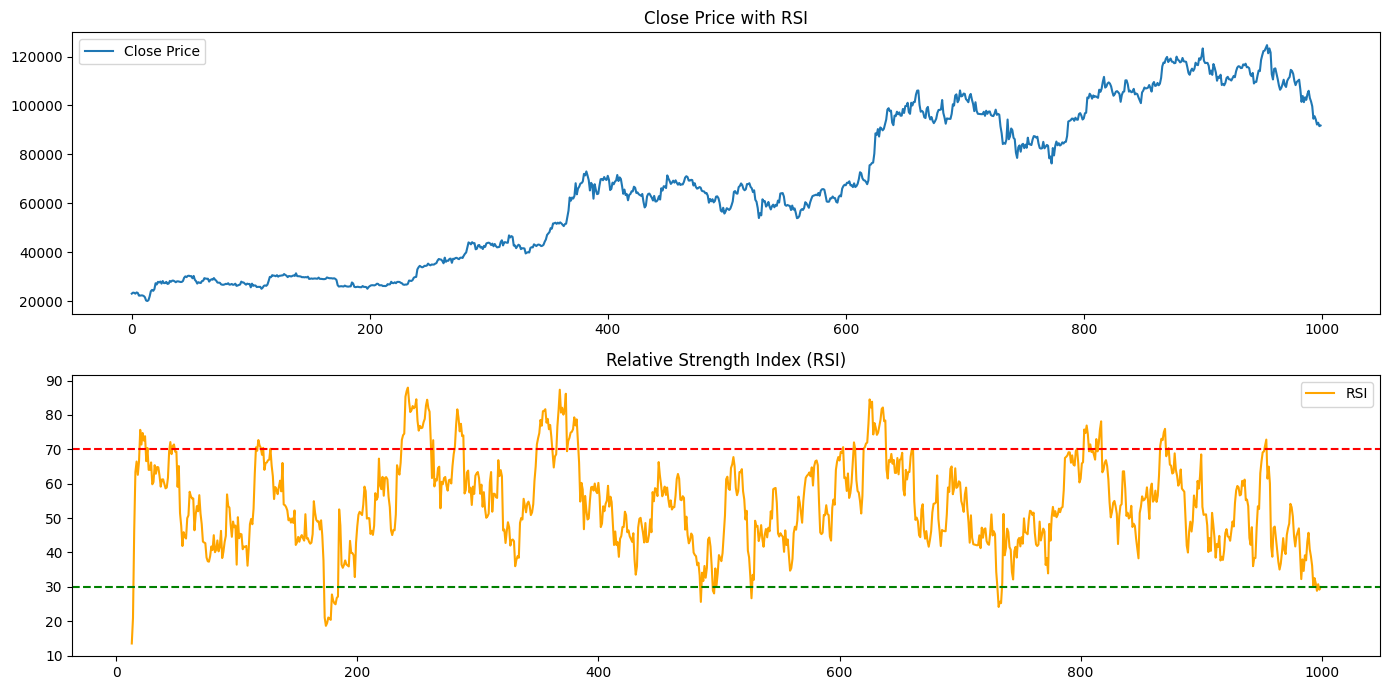

In [131]:
#visualize the features of rsi
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
plt.subplot(2,1,1)
plt.plot(data['close'], label='Close Price')
plt.title('Close Price with RSI')
plt.legend()
plt.subplot(2,1,2)
plt.plot(data['rsi'], label='RSI', color='orange')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.tight_layout()
plt.show()


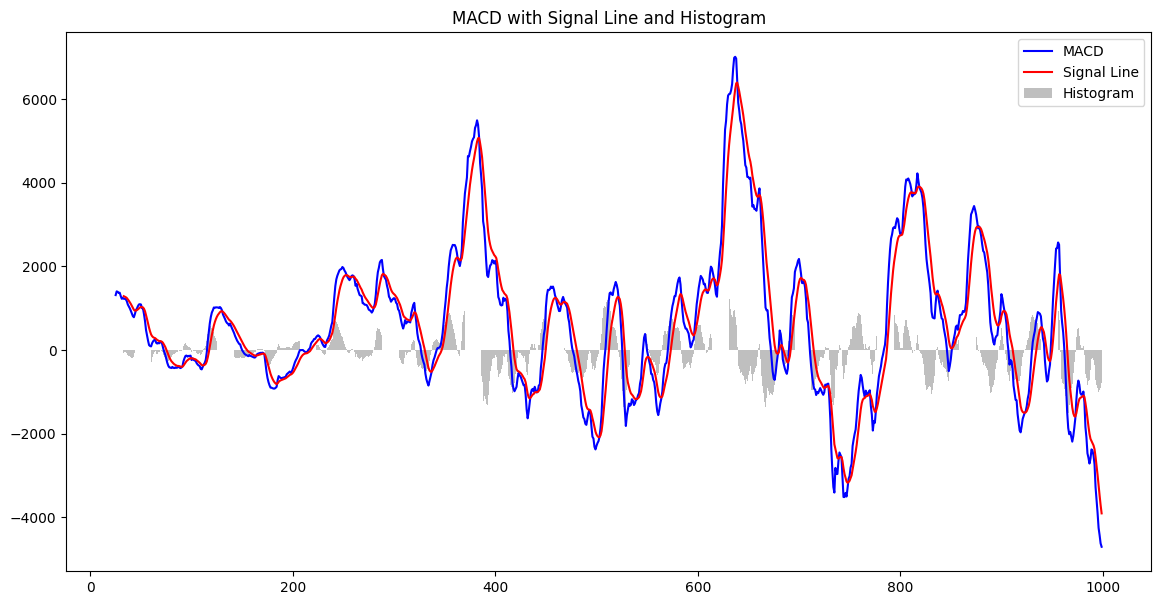

In [132]:
#plot macd with signal and histogram
plt.figure(figsize=(14,7))
plt.plot(data['macd'], label='MACD', color='blue')
macd_full = ta.trend.MACD(data['close'])
plt.plot(macd_full.macd_signal(), label='Signal Line', color='red')
plt.bar(data.index, macd_full.macd_diff(), label='Histogram', color='gray', alpha=0.5)
plt.title('MACD with Signal Line and Histogram')
plt.legend()
plt.show()

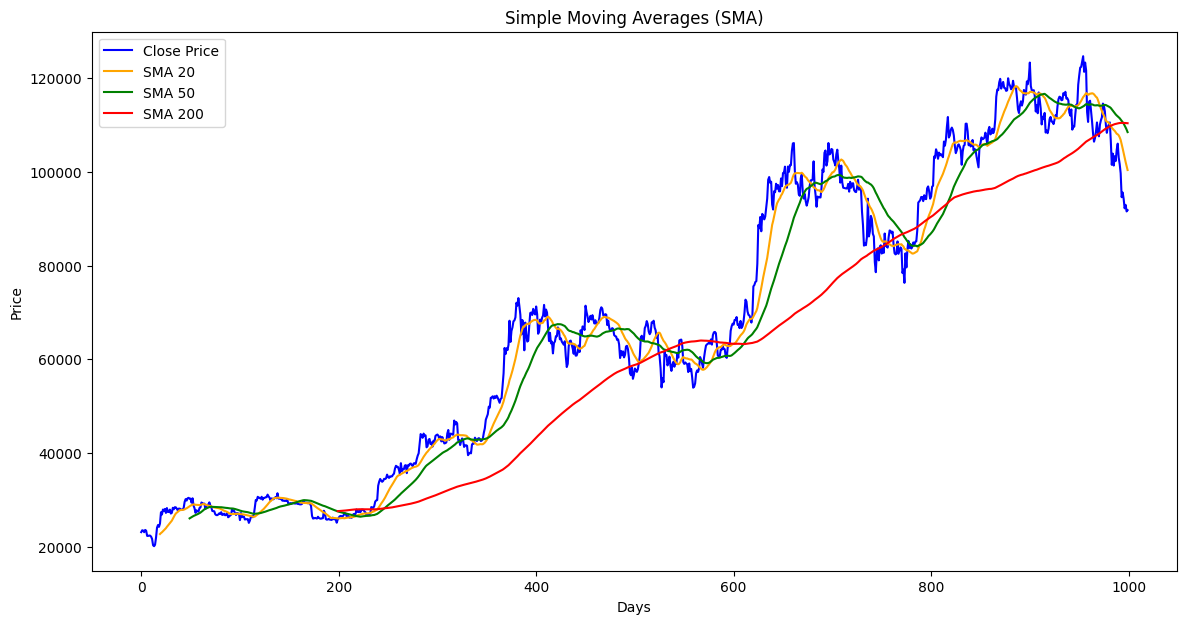

In [133]:
# Visualize the sma20, sma50, sma200 features
plt.figure(figsize=(14,7))
plt.plot(data['close'], label='Close Price', color='blue')  
plt.plot(data['sma20'], label='SMA 20', color='orange')
plt.plot(data['sma50'], label='SMA 50', color='green')
plt.plot(data['sma200'], label='SMA 200', color='red')
plt.title('Simple Moving Averages (SMA)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()


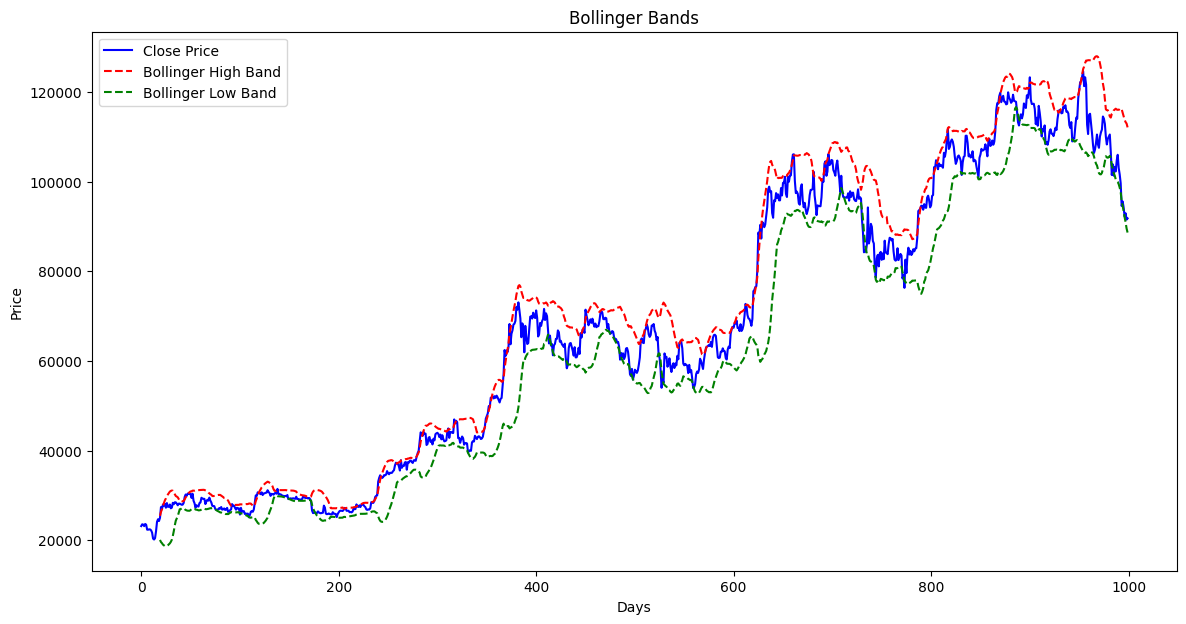

In [134]:

# visualize the bollinger bands
plt.figure(figsize=(14,7))
plt.plot(data['close'], label='Close Price', color='blue')
plt.plot(data['bb_high'], label='Bollinger High Band', color='red', linestyle='--')
plt.plot(data['bb_low'], label='Bollinger Low Band', color='green', linestyle='--')
plt.title('Bollinger Bands')   
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

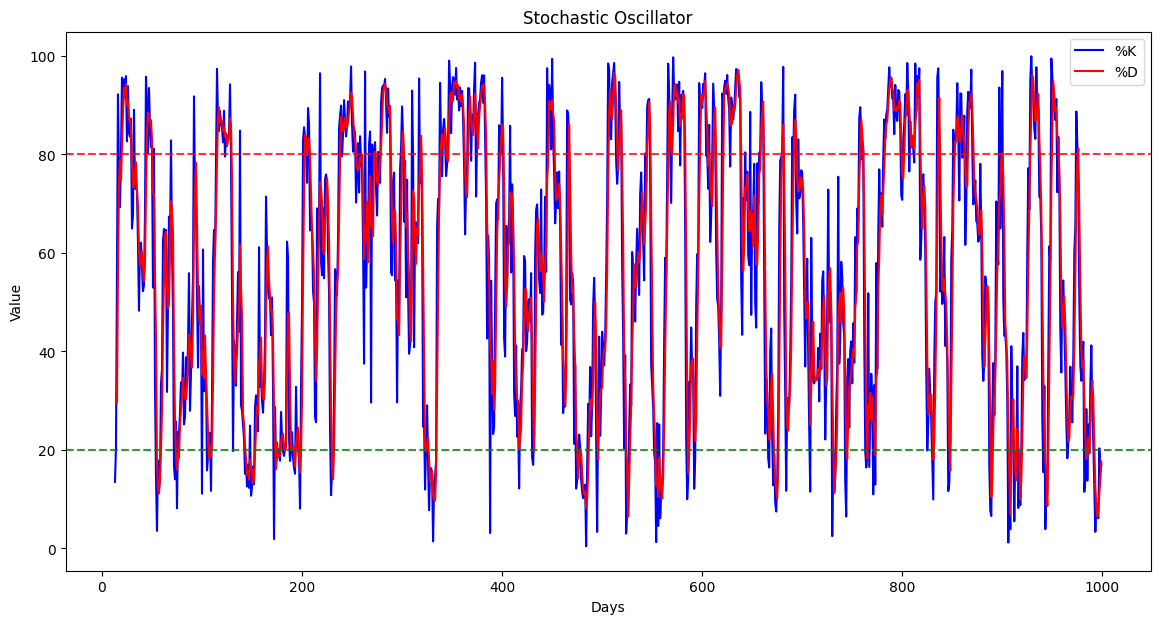

In [135]:
#visualize the stochastic oscillator with %k and %d
plt.figure(figsize=(14,7))
plt.plot(data['stochastic_oscillator'], label='%K', color='blue') 
stoch = ta.momentum.StochasticOscillator(data['high'], data['low'], data['close'])
plt.plot(stoch.stoch_signal(), label='%D', color='red')
plt.axhline(80, color='red', linestyle='--', alpha=0.8)
plt.axhline(20, color='green', linestyle='--', alpha=0.8)
plt.title('Stochastic Oscillator')
plt.xlabel('Days')
plt.ylabel('Value')
plt.legend()
plt.show()


In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   open_time              1000 non-null   object 
 1   open                   1000 non-null   float64
 2   high                   1000 non-null   float64
 3   low                    1000 non-null   float64
 4   close                  1000 non-null   float64
 5   volume                 1000 non-null   float64
 6   close_time             1000 non-null   object 
 7   quote_asset_volume     1000 non-null   float64
 8   num_trades             1000 non-null   int64  
 9   taker_base_volume      1000 non-null   float64
 10  taker_quote_volume     1000 non-null   float64
 11  1_day_return           999 non-null    float64
 12  7_day_return           993 non-null    float64
 13  7_day_volatility       993 non-null    float64
 14  rsi                    987 non-null    float64
 15  macd 

In [137]:
#drop na values
data= data.dropna().reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   open_time              801 non-null    object 
 1   open                   801 non-null    float64
 2   high                   801 non-null    float64
 3   low                    801 non-null    float64
 4   close                  801 non-null    float64
 5   volume                 801 non-null    float64
 6   close_time             801 non-null    object 
 7   quote_asset_volume     801 non-null    float64
 8   num_trades             801 non-null    int64  
 9   taker_base_volume      801 non-null    float64
 10  taker_quote_volume     801 non-null    float64
 11  1_day_return           801 non-null    float64
 12  7_day_return           801 non-null    float64
 13  7_day_volatility       801 non-null    float64
 14  rsi                    801 non-null    float64
 15  macd  

In [139]:
data.to_csv('../data/processed/crypto_feature_engineered_data.csv', index=False)